# 打靶法计算两点边值问题

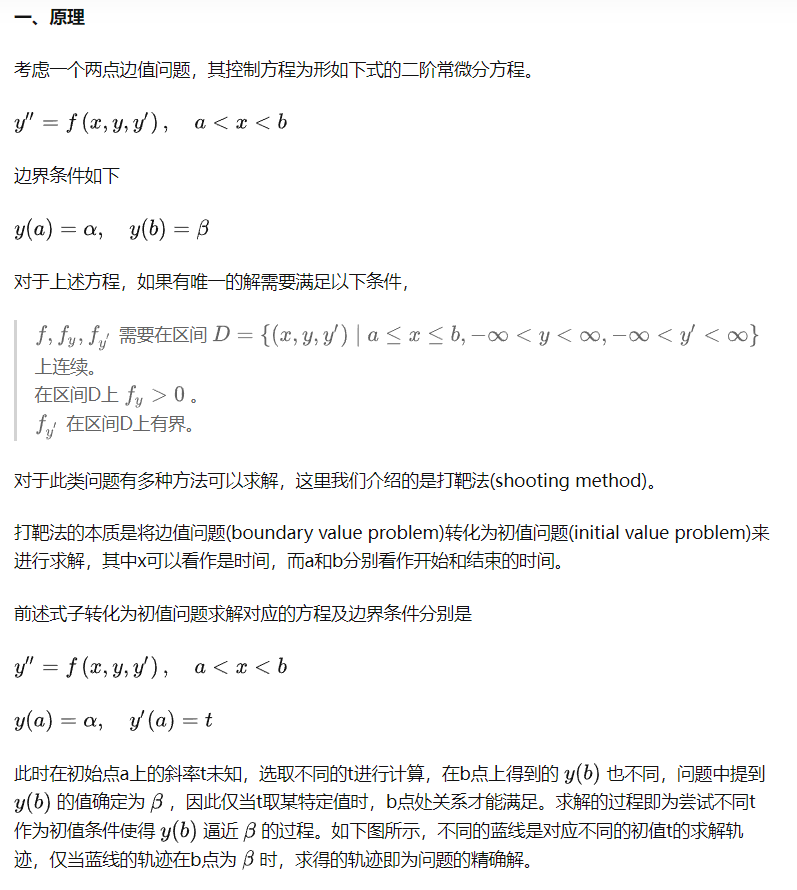

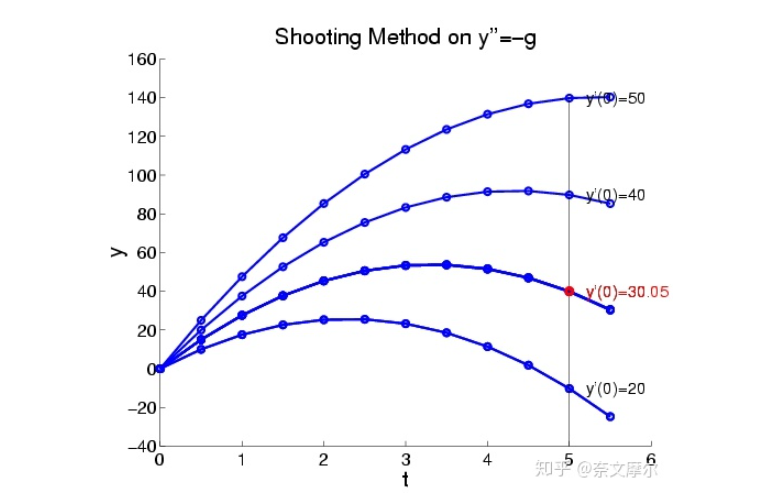

kStep:0	y1[-1] = 0.23242597002913645	former_y1[-1] = 0.0
----------------------Converged!---------------------
Total kSteps:1	y1[-1] = -5.2909066017292616e-17


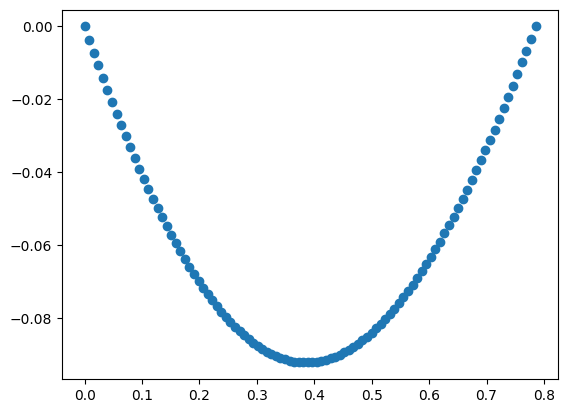

In [4]:
import numpy as np
import math
import sympy
import matplotlib.pyplot as plt
"""
:Description:打靶法数值求解微分方程，形式为
:y'' = q(x)y' +p(x)y + x    (1)
:y(a) = alpha               (2)
:y(b) = beta                (3)
:这里把y写作y1, y'写作y2
:f_i: 需要求解的微分方程
:a, b: 式(2)(3)中a,b
:alpha,beta: 式(2)(3)中alpha,beta
:i_epochs: x方向采样点
:k_epochs: 迭代次数上限
:converge_tolerance: 收敛判据
"""
def shootingMethod(f_i, a, b, alpha, beta, i_epochs = 25, k_epochs = 1000, converge_tolerance = 0.001):
    
    # i采样间隔
    h = (b - a) / i_epochs
    # t值矩阵
    t_k = np.zeros(k_epochs + 1)
    # x网格化
    x_i = np.linspace(a, b, i_epochs)
    # 对y求导
    fy1_xy1y2 = sympy.diff(f_i, y1)
    # 对y'求导
    fy2_xy1y2 = sympy.diff(f_i, y2)

    # 用来存旧的离散函数点
    former_y1_i = np.zeros(i_epochs)

    # 迭代中用到的变量
    y1_i = np.zeros(i_epochs)
    y2_i = np.zeros(i_epochs)
    z1_i = np.zeros(i_epochs)
    z2_i = np.zeros(i_epochs)

    # k迭代
    for k in range(k_epochs):
        
        i = 0
        y1_i[0] = alpha
        y2_i[0] = t_k[k]
        z1_i[0] = 0
        z2_i[0] = 1
        
        # 在x轴上遍历
        for i in range(i_epochs - 1):
            y1_i[i + 1] = y1_i[i] + h * y2_i[i]
            y2_i[i + 1] = y2_i[i] + h * f_i.subs([(x, x_i[i]), (y1, y1_i[i]), (y2, y2_i[i])])
            z1_i[i + 1] = z1_i[i] + h * z2_i[i]
            z2_i[i + 1] = z2_i[i] + h * (fy1_xy1y2.subs([(x, x_i[i]), (y1, y1_i[i]), (y2, y2_i[i])]) * z1_i[i] + \
                                        fy2_xy1y2.subs([(x, x_i[i]), (y1, y1_i[i]), (y2, y2_i[i])]) * z2_i[i])
        
        # 更新t值
        t_k[k + 1] = t_k[k] - ((y1_i[-1] - beta) / z1_i[-1])
        # 每10步输出一次
        if k % 10 == 0:
            print("kStep:{}\ty1[-1] = {}\tformer_y1[-1] = {}".format(k, y1_i[-1], former_y1_i[-1]))
        
        # 收敛判据
        if np.sum(abs(former_y1_i - y1_i)) <= converge_tolerance:
            print("----------------------Converged!---------------------")
            print("Total Steps:{}\ty1[-1] = {}".format(k, y1_i[-1], former_y1_i[-1]))
            
            return y1_i
        former_y1_i = y1_i

a = 0
b = math.pi / 4
alpha = 0
beta = 0
x, y1, y2 = sympy.symbols('x, y1, y2')
f_i = -4 * y1 + sympy.cos(x)
i_epochs = 100
k_epochs = 1000
converge_tolerance = 0.001

y1_i = shootingMethod(f_i, a, b, alpha, beta, i_epochs, k_epochs, converge_tolerance)

plt.scatter(np.linspace(a, b, i_epochs), y1_i)